In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os

In [2]:
df = pd.read_csv(os.path.join('ai_project', 'data', "raw", "train.csv"))

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Sale price analysis

In [48]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

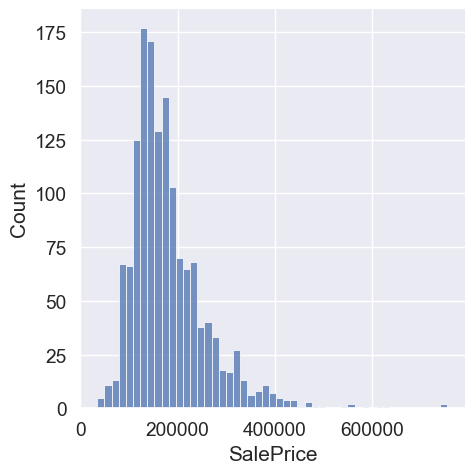

In [49]:
sns.displot(df["SalePrice"])

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

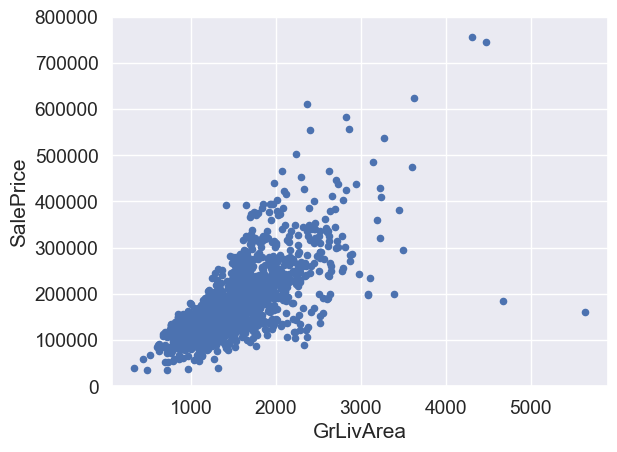

In [50]:
x_label = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[x_label]], axis=1)
data.plot.scatter(x=x_label, y='SalePrice', ylim=(0, 800000))

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

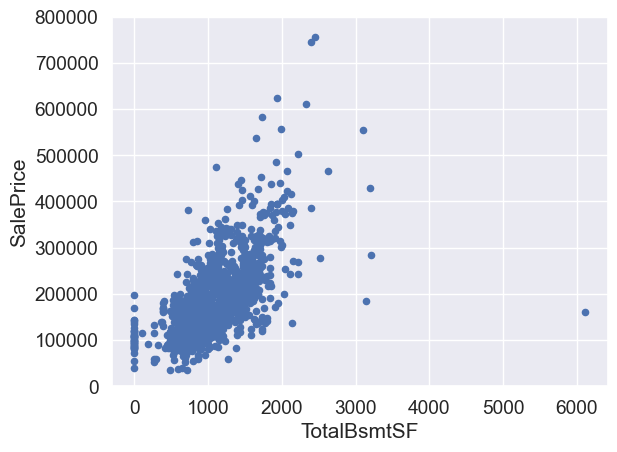

In [51]:
x_label = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[x_label]], axis=1)
data.plot.scatter(x=x_label, y='SalePrice', ylim=(0, 800000))

### Relationship with categorical features

(-0.5, 9.5, 0.0, 800000.0)

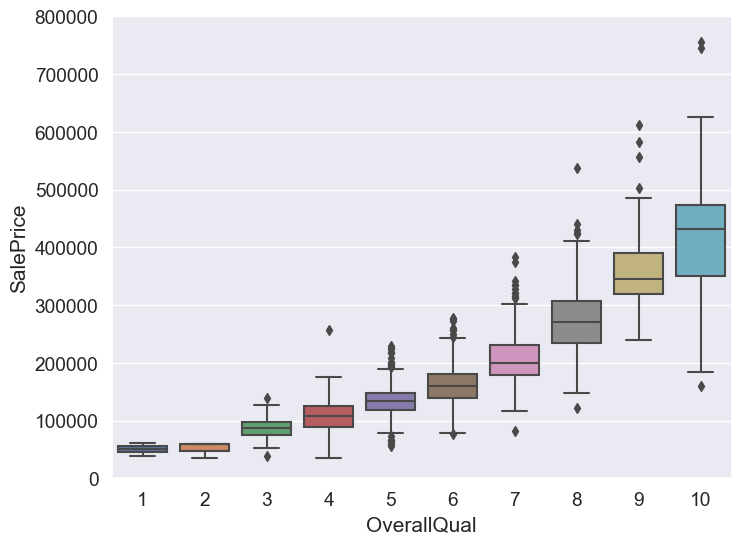

In [52]:
x_label = 'OverallQual'
data = pd.concat([df['SalePrice'], df[x_label]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=x_label, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

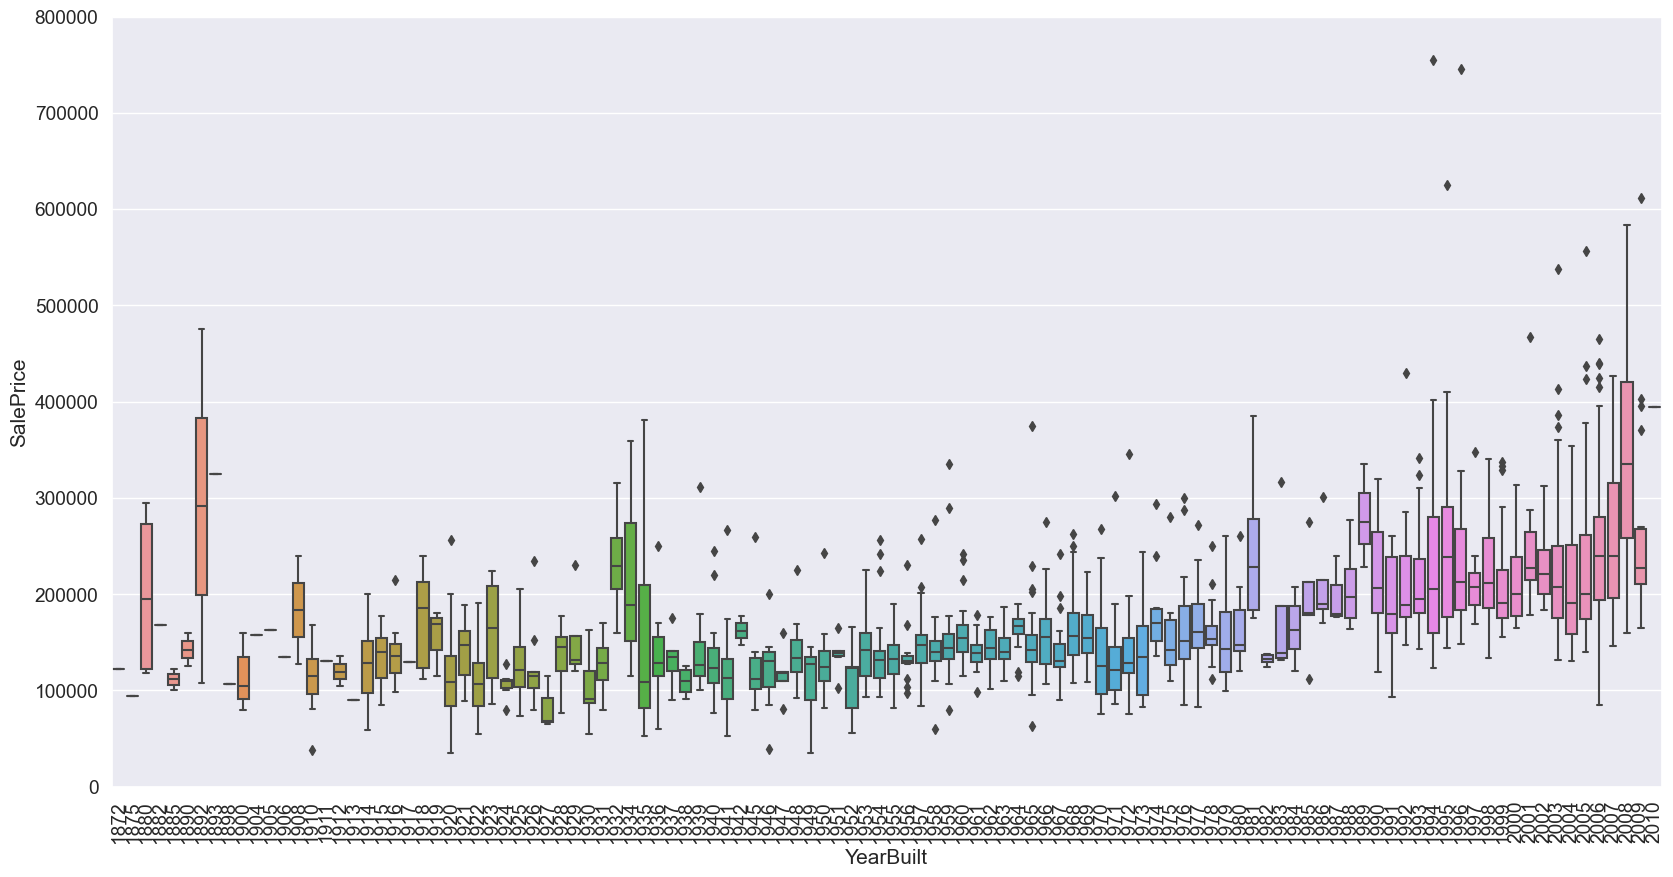

In [53]:
x_label = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[x_label]], axis=1)

f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=x_label, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

### The plasma soup

C:\Users\urzed\AppData\Local\Temp\ipykernel_1460\723553396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<AxesSubplot: >

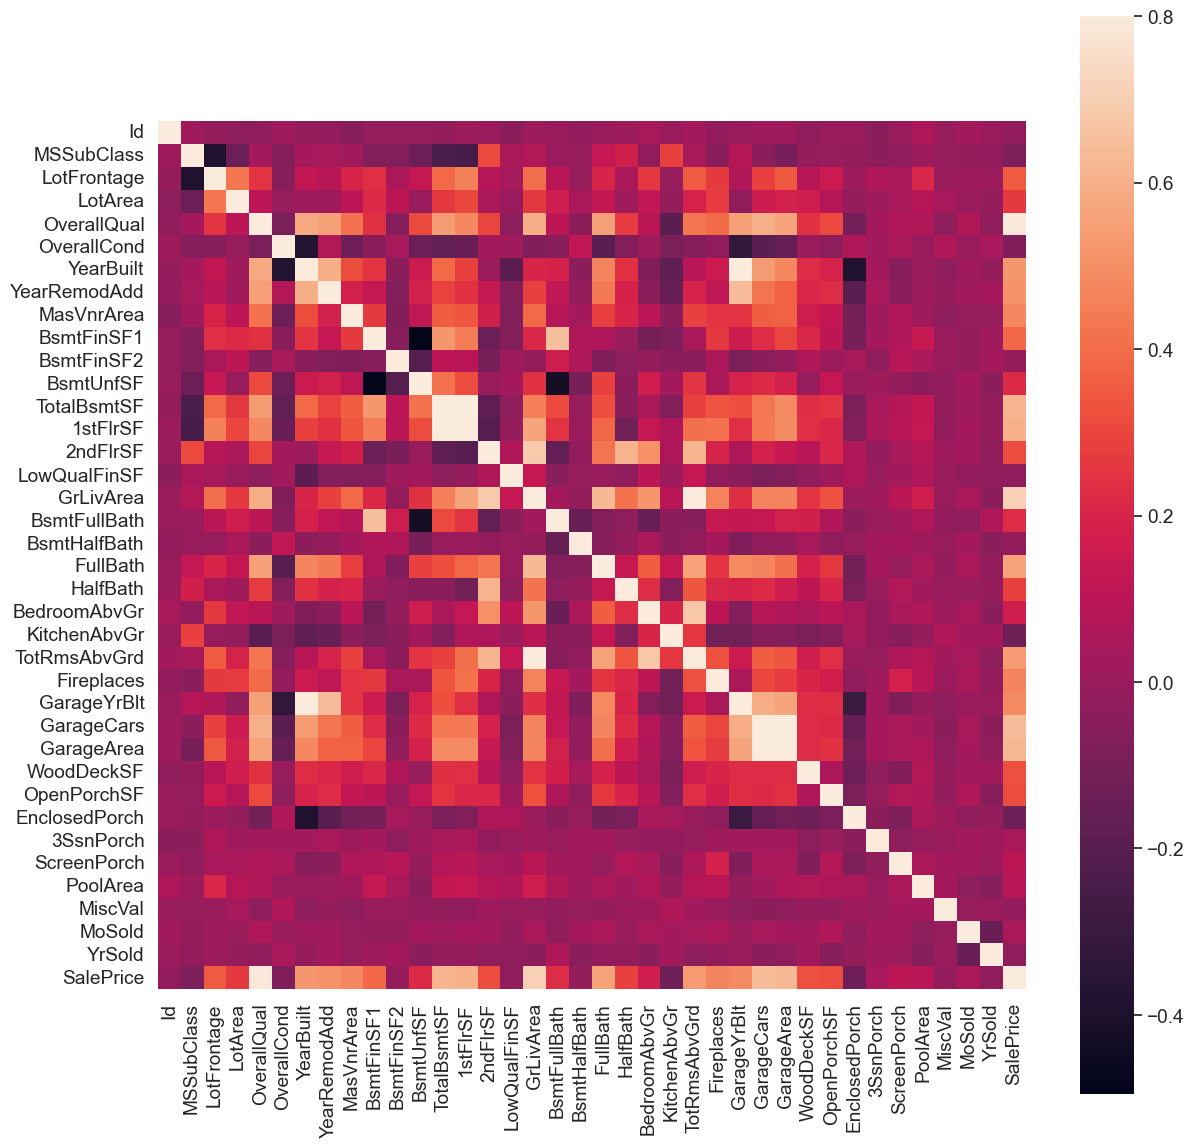

In [54]:
# Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corrmat, vmax=0.8, square=True)

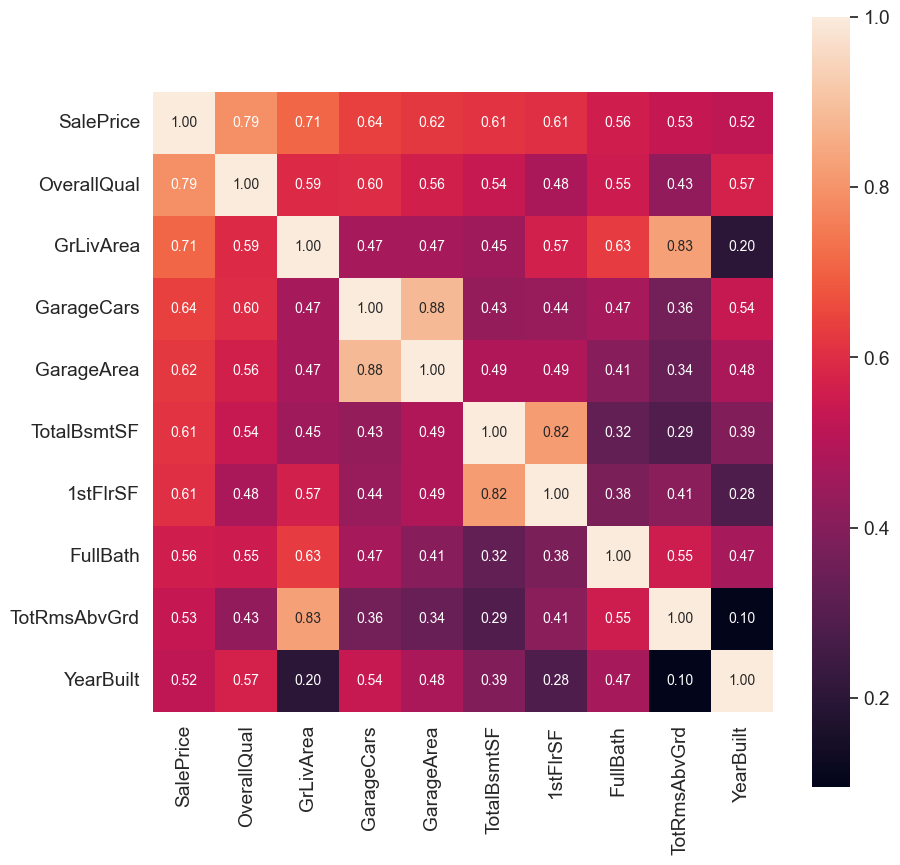

In [55]:
# Saleprice correlation matrix
k = 10 # numbers of variables in heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

d:\Studia II\Advanced Topic in Artificial Intelligence\Project\AI_project\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


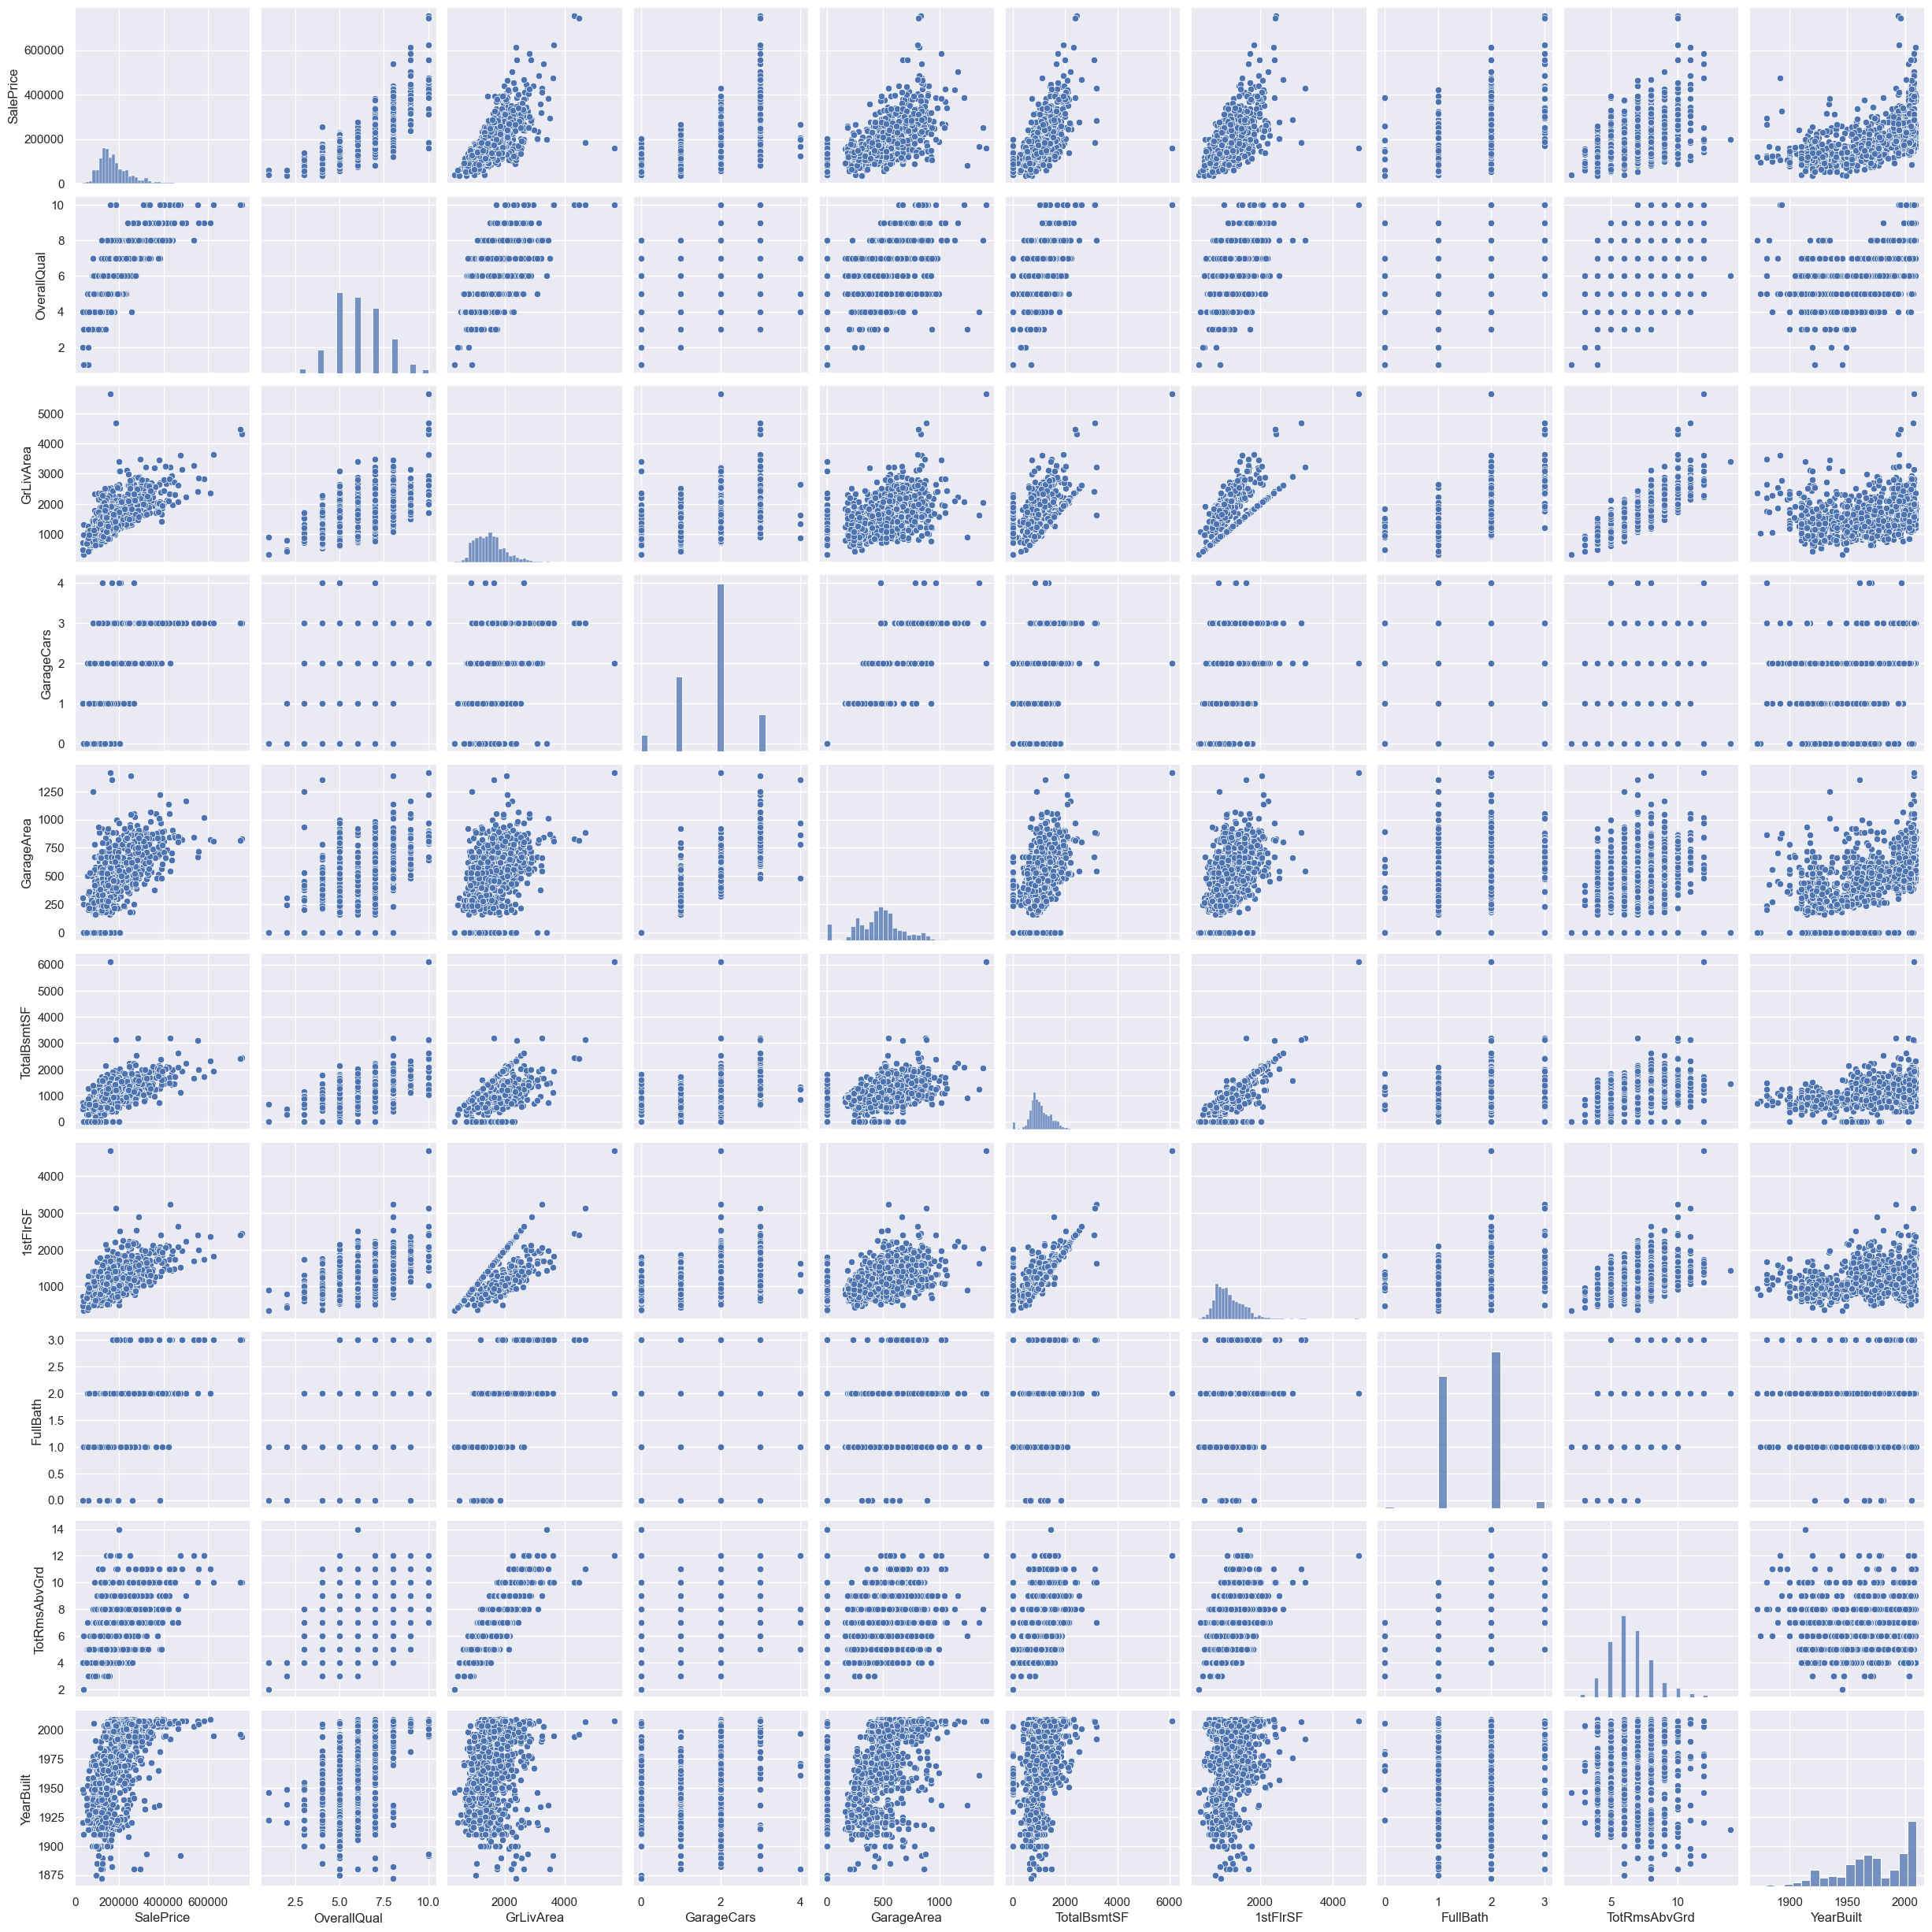

In [56]:
sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size=2.5)
plt.show()


### Missing data

In [57]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values()
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [58]:
missing_data[missing_data['Total'] > 1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [59]:
df: pd.DataFrame = df.drop(missing_data[missing_data['Total'] > 1].index, 1)
df: pd.DataFrame = df.drop(df.loc[df['Electrical'].isnull()].index)

C:\Users\urzed\AppData\Local\Temp\ipykernel_1460\3534756373.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df: pd.DataFrame = df.drop(missing_data[missing_data['Total'] > 1].index, 1)


In [64]:
save_path = os.path.join('processed', 'house_price.csv')
df[cols].to_csv(save_path, index=False)

### Standarizing data

In [60]:
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print("outer range (Low) of the distribution")
print(low_range)
print("\nouter range (High) of the distribution")
print(high_range)


outer range (Low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (High) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\urzed\AppData\Local\Temp\ipykernel_1460\2375907075.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:, np.newaxis])


#### Bivariate analysis saleprice/grlivarea

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

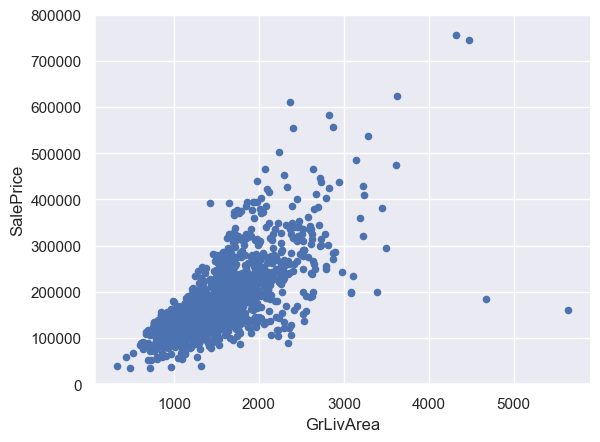

In [21]:
label = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[label]], axis=1)
data.plot.scatter(x=label, y='SalePrice', ylim=(0, 800000))

In [34]:
# Deleting outliers
df[((df['GrLivArea'] > 4000 ) & (df['SalePrice'] < 200000))]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# X
ar = np.linspace(1, 10, 100)
# Y
plf1 = 1/(1 + ar ** 2)

plf2 = ar ** 2 / (1 + ar ** 2)

plf3 = (1 + ar) ** 2 / (2 * ((1 + ar ** 2)))

plf4 = (1-ar) ** 2 / (2+2 * ar ** 2)





Text(0, 0.5, 'PLF4')

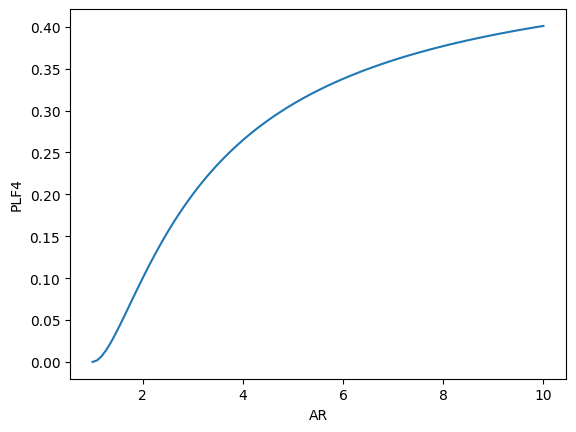

In [19]:
plt.plot(ar, plf4)
plt.xlabel('AR')
plt.ylabel('PLF4')